In [1]:
require(dplyr)
require(ggplot2)

# Función para ajustar el tamaño de las imágenes que se muestran
set_plot_dimensions = function(w, h) {
    options(repr.plot.width=w, repr.plot.height=h)
}

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



In [2]:
subm_path = "/home/franblue/PROYECTOS/lulc/submission_history.csv"
df = read.csv(subm_path)
#df = df %>% mutate(order=c(1:nrow(df)))

In [3]:
type_vec = rep("", nrow(df))
for (name in c("vgg", "resnet", "bitresnet", "efficientnet", "mobilenet", "ensemble", "nasnetmobile", "ViT")){
    idx = startsWith(df$submission_name, name)
    type_vec[idx] = name
}

da_vec = rep("", nrow(df))
for (name in c("DA0", "DA1", "DA2", "DA3", "DA4", "DA5")){
    idx = endsWith(df$submission_name, name)
    da_vec[idx] = name
}

In [4]:
df = df %>%
    mutate(order=c(1:nrow(df))) %>% 
    mutate(model_type=factor(type_vec, levels=c("vgg", "resnet", "bitresnet", "efficientnet", "mobilenet", "ensemble", "nasnetmobile", "ViT"), labels=c("VGG", "ResNet", "BITResNet", "EfficientNet", "MobileNet", "Ensemble", "NasNetMobile", "ViT"))) %>% 
    mutate(da_type=factor(da_vec, levels=c("DA0", "DA1", "DA2", "DA3", "DA4", "DA5"), labels=c("DA0", "DA1", "DA2", "DA3", "DA4", "DA5")))

In [5]:
up_df = df %>% filter(uploaded=="yes")
up_df = up_df %>% mutate(order=c(1:nrow(up_df)))

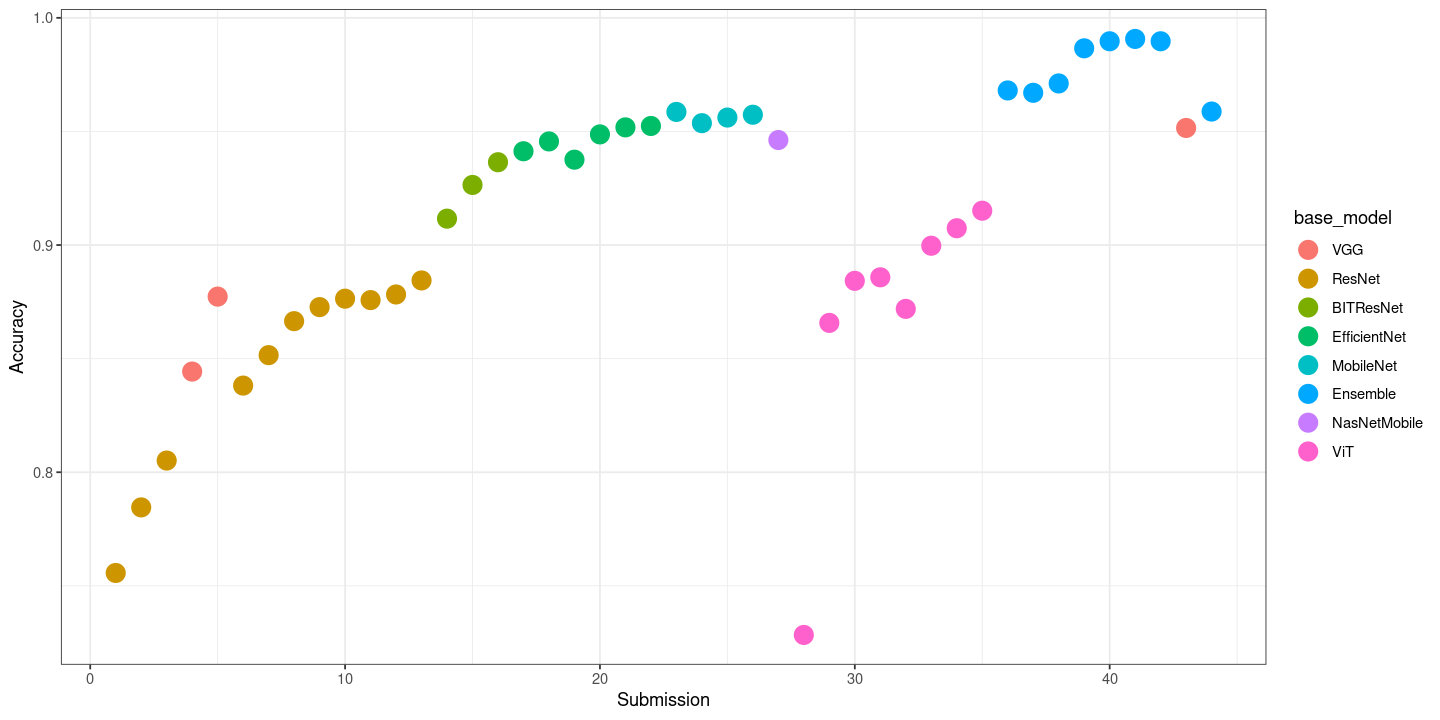

In [6]:
set_plot_dimensions(12,6)
up_df %>%
    ggplot(aes(x=order, y=test_acc, color=model_type)) + 
        geom_point(size=5) + 
        #geom_point(color="black", size=5, shape=1) + 
        labs(x="Submission", y="Accuracy") + 
        scale_color_discrete(name="base_model") + 
        theme_bw()

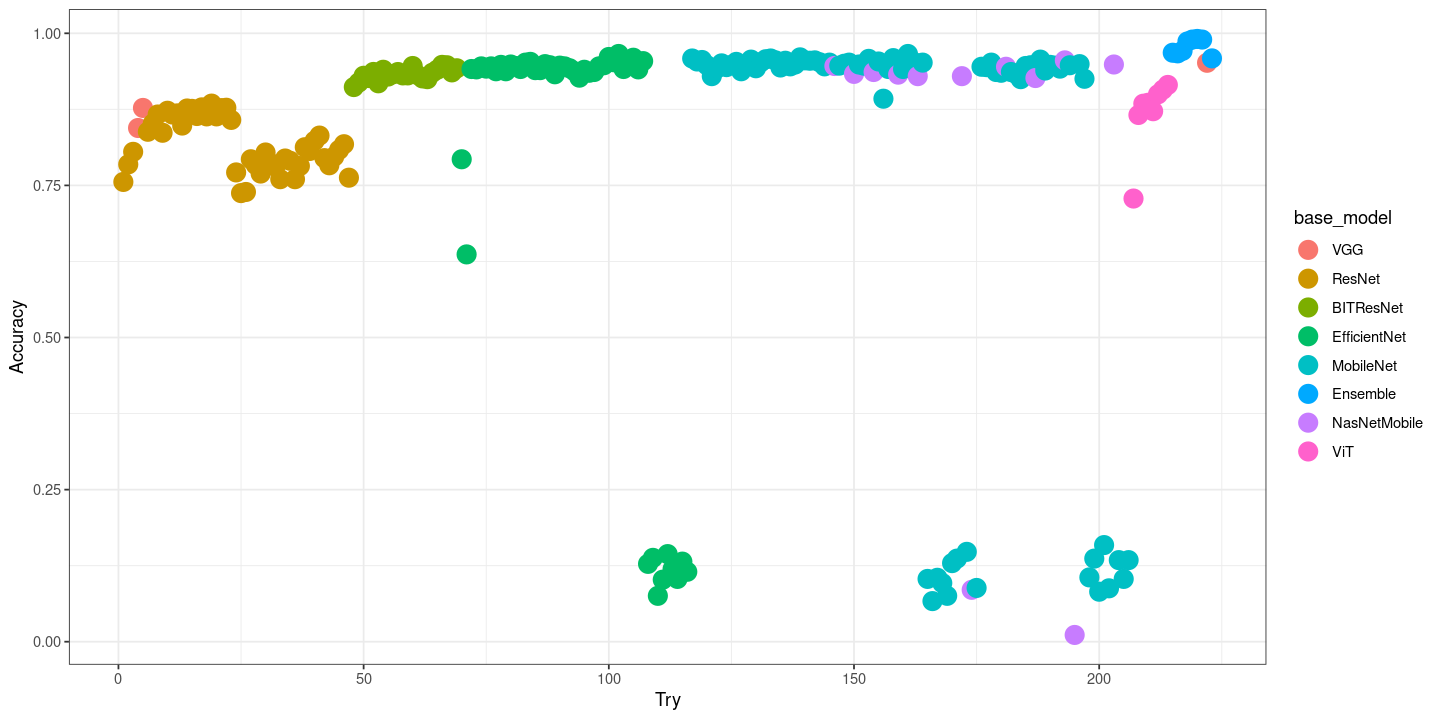

In [7]:
set_plot_dimensions(12,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    ggplot(aes(x=order, y=test_acc)) + 
        geom_point(aes(color=model_type), size=5) + 
        #geom_point(color="black", size=5, shape=1) + 
        labs(x="Try", y="Accuracy") + 
        scale_color_discrete(name="base_model") + 
        theme_bw()

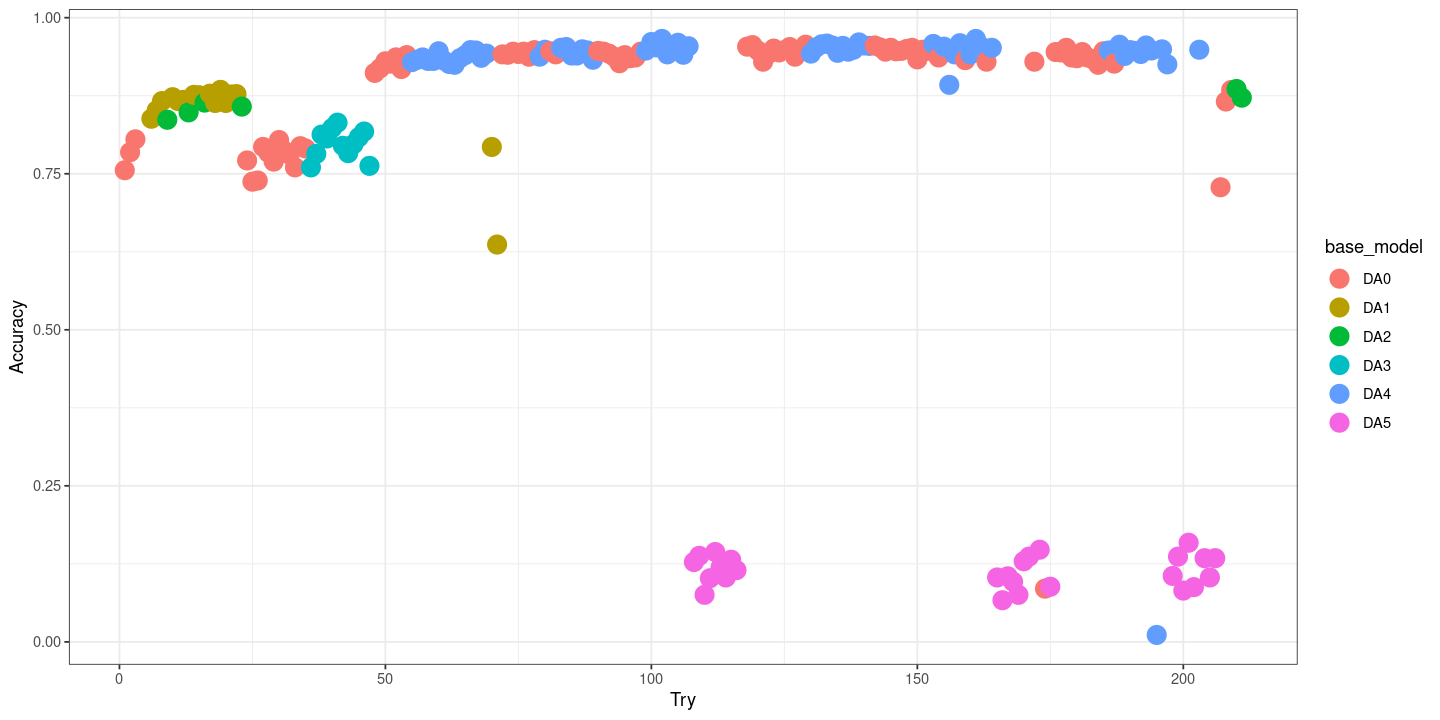

In [8]:
set_plot_dimensions(12,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    filter(!is.na(da_type)) %>%
    ggplot(aes(x=order, y=test_acc)) + 
        geom_point(aes(color=da_type), size=5) + 
        #geom_point(color="black", size=5, shape=1) + 
        labs(x="Try", y="Accuracy") + 
        scale_color_discrete(name="base_model") + 
        theme_bw()

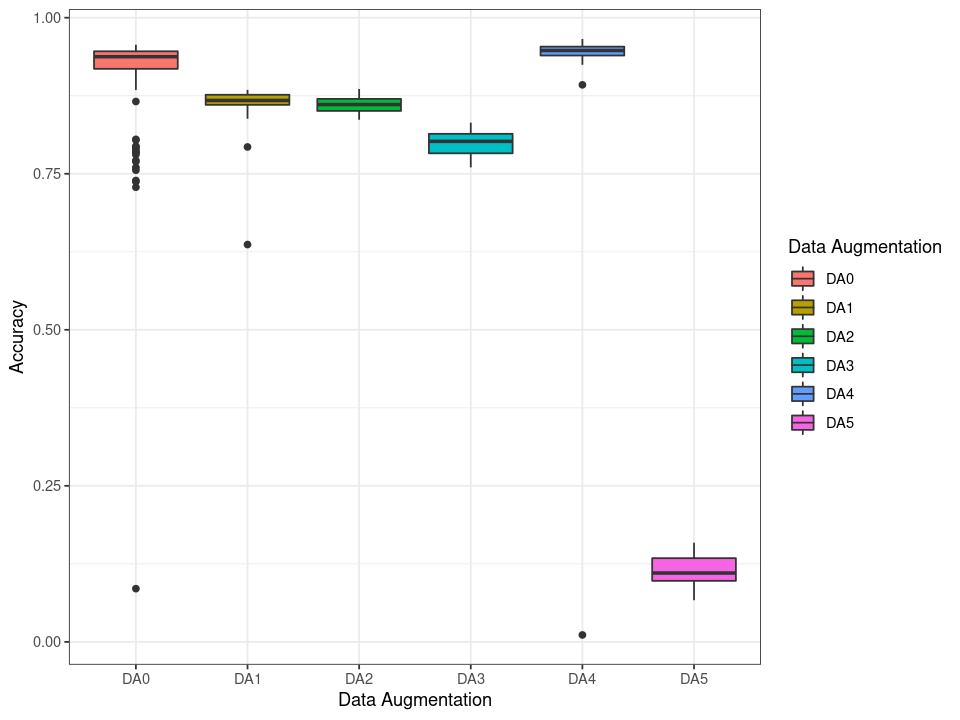

In [9]:
set_plot_dimensions(8,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    filter(!is.na(da_type)) %>%
    ggplot(aes(y=test_acc, x=da_type)) + 
        geom_boxplot(aes(fill=da_type)) + 
        #geom_point(color="black", size=5, shape=1) + 
        labs(y="Accuracy", x="Data Augmentation") + 
        scale_fill_discrete(name="Data Augmentation") + 
        theme_bw()

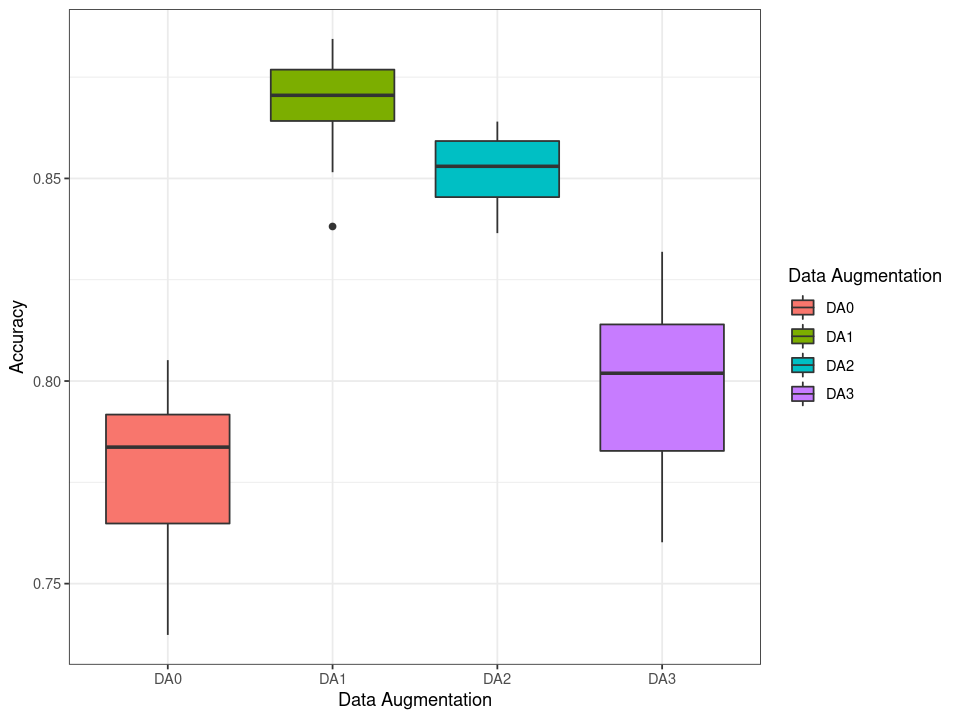

In [10]:
set_plot_dimensions(8,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    filter(!is.na(da_type)) %>%
    filter(model_type=="ResNet") %>%
    filter(da_type!="DA4") %>%  
    ggplot(aes(y=test_acc, x=da_type)) + 
            geom_boxplot(aes(fill=da_type)) + 
            #geom_point(color="black", size=5, shape=1) + 
            labs(y="Accuracy", x="Data Augmentation") + 
            scale_fill_discrete(name="Data Augmentation") + 
            theme_bw()

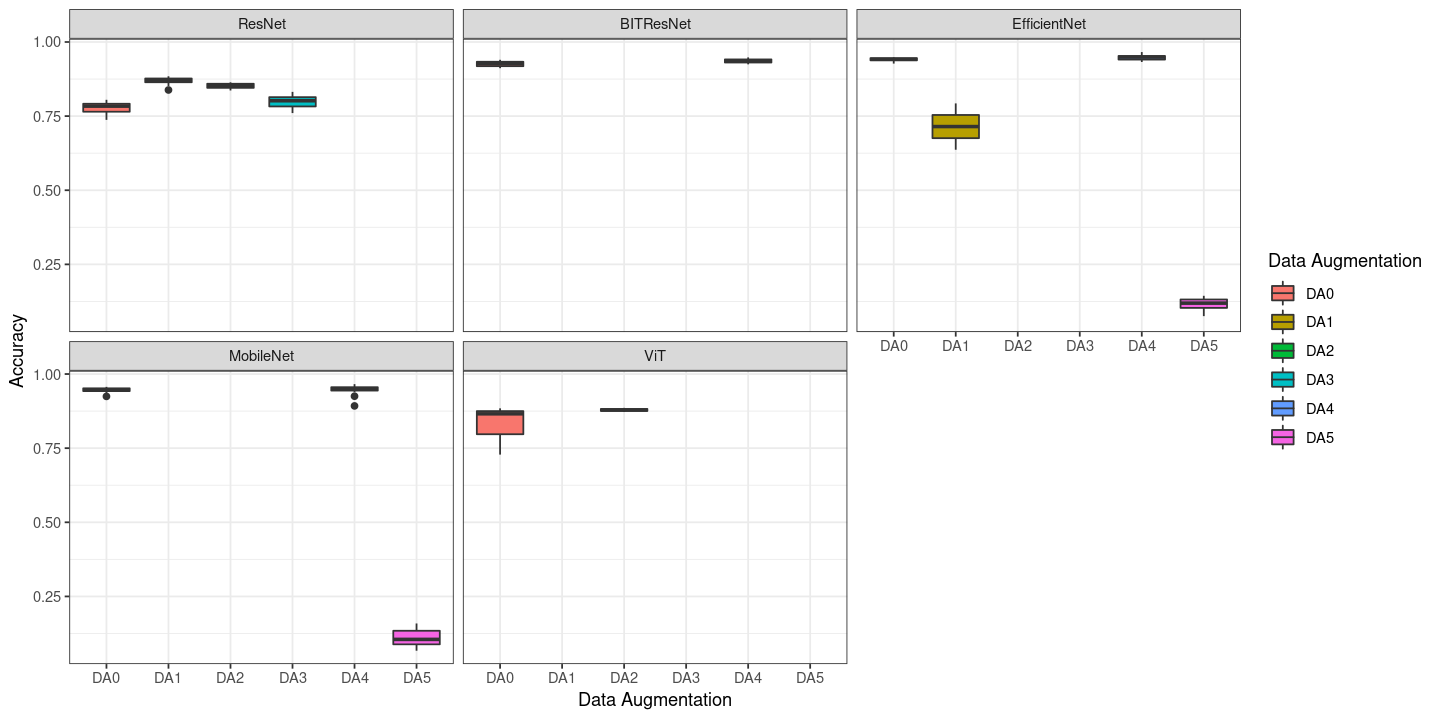

In [11]:
set_plot_dimensions(12,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    filter(!is.na(da_type)) %>%
    filter(model_type != "NasNetMobile") %>%
    ggplot(aes(y=test_acc, x=da_type)) + 
        geom_boxplot(aes(fill=da_type)) + 
        #geom_point(color="black", size=5, shape=1) + 
        labs(y="Accuracy", x="Data Augmentation") + 
        scale_fill_discrete(name="Data Augmentation") + 
        facet_wrap(~model_type, ncol=3) + 
        theme_bw()

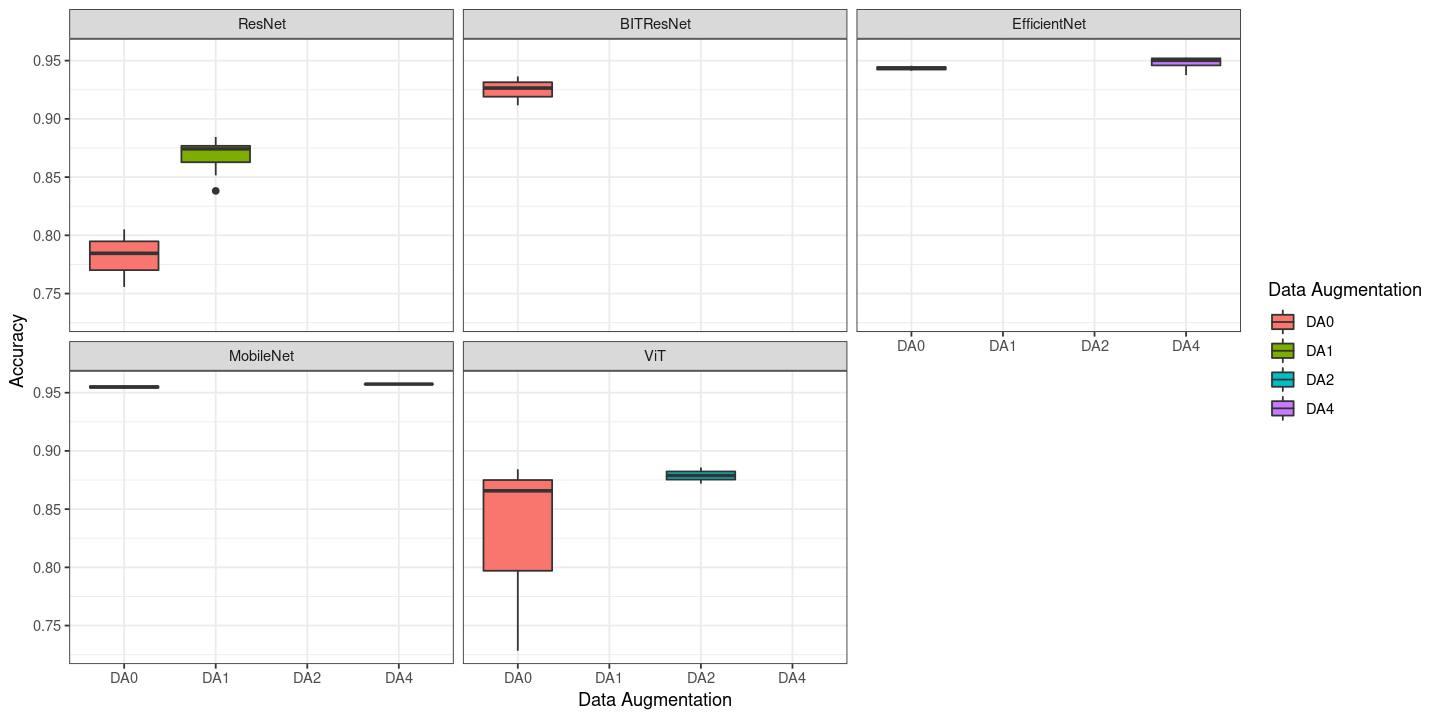

In [12]:
set_plot_dimensions(12,6)
df %>%
    mutate(order=c(1:nrow(df))) %>% 
    filter(!is.na(da_type)) %>%
    filter(model_type != "NasNetMobile") %>%
    filter(uploaded=="yes") %>%
    ggplot(aes(y=test_acc, x=da_type)) + 
            geom_boxplot(aes(fill=da_type)) + 
            #geom_point(color="black", size=5, shape=1) + 
            labs(y="Accuracy", x="Data Augmentation") + 
            scale_fill_discrete(name="Data Augmentation") + 
            facet_wrap(~model_type, ncol=3) + 
            theme_bw()